In [1]:
import pandas as pd
import numpy as np
import re
import random
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [3]:
data_location = 'https://github.com/DHDSDesafios/DH_DS_desafio_2_properati/raw/master/data/properatid2caba.zip'
data = pd.read_csv(data_location, compression='zip', encoding="utf-8")

In [4]:
list(data)

['Id_caso',
 'property_type',
 'place_with_parent_names',
 'country_name',
 'state_name',
 'lat-lon',
 'lat',
 'lon',
 'price',
 'currency',
 'price_aprox_local_currency',
 'price_aprox_usd',
 'floor',
 'rooms',
 'expenses',
 'description',
 'title',
 'Pais',
 'Zona',
 'Partido_barrio',
 'Localidad',
 'Obs_localidad',
 'place_name',
 'geonames_id',
 'price_usd_per_m2',
 'price_per_m2',
 'surface_total_in_m2',
 'surface_covered_in_m2',
 'cochera',
 'piscina',
 'parrilla',
 'baulera',
 'balcon',
 'terraza',
 'jardin',
 'lavadero',
 'subte',
 'seguridad',
 'metrobus']

In [5]:
data.shape

(29380, 39)

In [6]:
def datosCol(col=None):
    try:
        if col.dtype != object:
            return {
                    'nombre': col.name,
                    'series_dt': col.dtype,
                    'nulos': int(len(col) - col.describe()[0]), 
                    'nulos_porcentaje': round(col.isnull().sum() / col.size*100, 2),
                    'unicos': int(len(col.value_counts())),
                    'mas_repetido': col.value_counts().index[0],
                    'minimo': round(col.min(), 2),
                    'maximo': round(col.max(), 2),
                    'media': round(col.describe()[1], 2),
                    'mediana': col.median(),
                    'desvio': round(col.describe()[2], 2),
                    'q25': col.describe()[4],
                    'q50': col.describe()[5],
                    'q75': col.describe()[6],
                    'values_dt': [x for x in col.apply(lambda x: type(x)).value_counts().index]
                   }
        else:
            return {
                    'nombre': col.name,
                    'series_dt': col.dtype,
                    'nulos': col.isnull().sum(),
                    'nulos_porcentaje': round(col.isnull().sum() / col.size*100, 2),
                    'unicos': int(col.describe()[1]), 
                    'mas_repetido': col.describe()[2],
                    'nulos': col.isnull().sum(),
                    'frecuencia': int(col.describe()[3]),
                    'values_dt': [x for x in col.apply(lambda x: type(x)).value_counts().index]
                   }
    except:
        return 'use a valid pandas Series'

In [7]:
data_info = pd.DataFrame([datosCol(data[x]) for x in ['property_type', 'place_name', 'price_aprox_usd', 'floor', 'rooms',
                                                      'price_usd_per_m2', 'price_per_m2', 'surface_total_in_m2',
                                                      'surface_covered_in_m2', 'cochera', 'piscina', 'parrilla', 'baulera',
                                                      'balcon', 'terraza', 'jardin', 'lavadero'] ])
data_info

,nombre,series_dt,nulos,nulos_porcentaje,unicos,mas_repetido,frecuencia,values_dt,minimo,maximo,media,mediana,desvio,q25,q50,q75
0,property_type,object,0,0.00,4,apartment,24713.0,[<class 'str'>],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,place_name,object,0,0.00,62,Belgrano,2745.0,[<class 'str'>],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,price_aprox_usd,float64,1532,5.21,5237,120000,NaN,[<class 'float'>],5103.61,46545445.00,263567.97,155000.00,452774.30,104724.465,155000.00,278000.00
3,floor,float64,26480,90.13,82,1,NaN,[<class 'float'>],1.00,2509.00,12.64,4.00,83.22,2.000,4.00,7.00
4,rooms,float64,11341,38.60,17,2,NaN,[<class 'float'>],1.00,22.00,2.55,2.00,1.47,1.000,2.00,3.00
5,price_usd_per_m2,float64,7227,24.60,10452,2500,NaN,[<class 'float'>],13.80,206333.33,3146.57,2486.41,3722.99,1988.950,2486.41,3094.27
6,price_per_m2,float64,2512,8.55,12115,2500,NaN,[<class 'float'>],3.21,2600000.00,3839.77,2727.27,18864.14,2177.420,2727.27,3440.00
7,surface_total_in_m2,float64,3638,12.38,734,40,NaN,[<class 'float'>],0.00,200000.00,116.88,62.00,1268.88,42.000,62.00,110.00
8,surface_covered_in_m2,float64,1170,3.98,620,30,NaN,[<class 'float'>],0.00,10958.00,91.43,55.00,203.58,38.000,55.00,95.00
9,cochera,float64,19299,65.69,1,1,NaN,[<class 'float'>],1.00,1.00,1.00,1.00,0.00,1.000,1.00,1.00


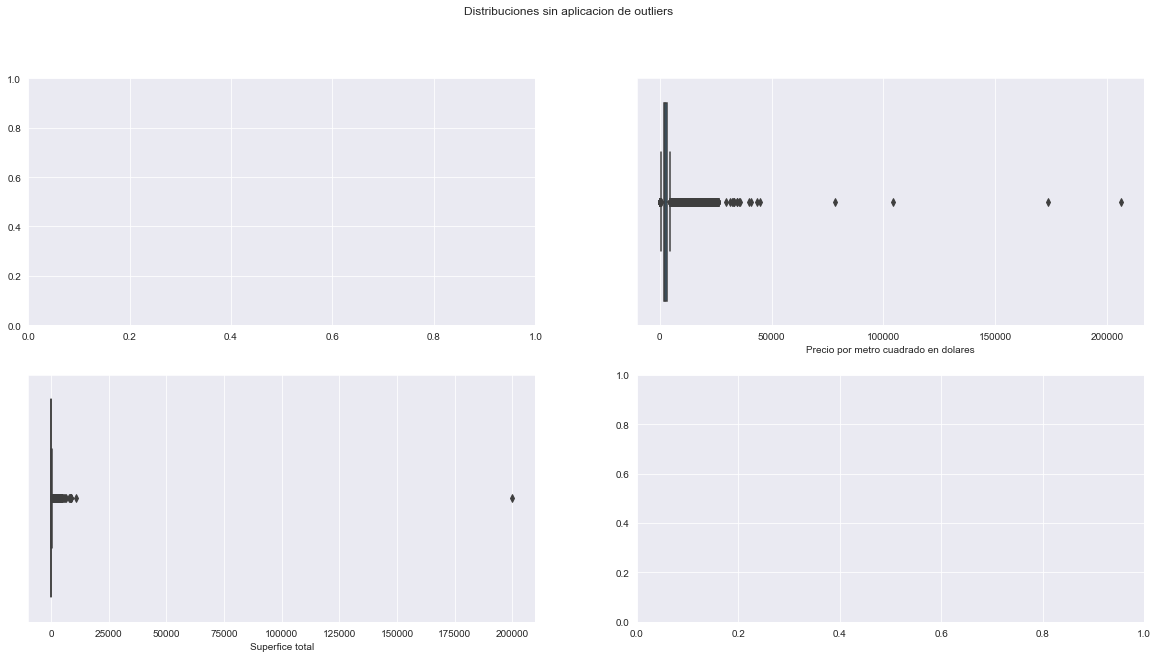

In [8]:
sns.set_style("darkgrid")
fig, axs = plt.subplots(2,2,figsize=(20,10))
fig.suptitle('Distribuciones sin aplicacion de outliers')

sns.boxplot(x='price_usd_per_m2', data=data, ax=axs[0,1])
axs[0,1].set(xlabel='Precio por metro cuadrado en dolares')

sns.boxplot(x='surface_total_in_m2', data=data, ax=axs[1,0])
axs[1,0].set(xlabel='Superfice total')

plt.show()

In [9]:
data.loc[data.cochera.isnull(), 'cochera'] = 0
data.cochera.astype('uint8')

data.loc[data.piscina.isnull(), 'piscina'] = 0
data.piscina.astype('uint8')

data.loc[data.parrilla.isnull(), 'parrilla'] = 0
data.parrilla.astype('uint8')

data.loc[data.baulera.isnull(), 'baulera'] = 0
data.baulera.astype('uint8')

data.loc[data.balcon.isnull(), 'balcon'] = 0
data.loc[data.balcon == 'Balcon', 'balcon'] = 1
data.loc[data.balcon == 'BALCON', 'balcon'] = 1
data.loc[data.balcon == 'balcon', 'balcon'] = 1
data.loc[data.balcon == '1', 'balcon'] = 1
data["balcon"] =  pd.to_numeric(data["balcon"])

data.loc[data.terraza.isnull(), 'terraza'] = 0
data.terraza.astype('uint8')

data.loc[data.jardin.isnull(), 'jardin'] = 0
data.jardin.astype('uint8')

data.loc[data.lavadero.isnull(), 'lavadero'] = 0
data.lavadero.astype('uint8')

data.loc[data.subte.isnull(), 'subte'] = 0
data.subte.astype('uint8')

data.loc[data.seguridad.isnull(), 'seguridad'] = 0
data.seguridad.astype('uint8')

data.loc[data.metrobus.isnull(), 'metrobus'] = 0
data.metrobus.astype('uint8')


0        0
1        0
2        0
3        0
4        0
        ..
29375    0
29376    0
29377    0
29378    0
29379    0
Name: metrobus, Length: 29380, dtype: uint8

In [10]:
property_type_dummies = pd.get_dummies(data.property_type, prefix='prop_type', drop_first = True)
data = pd.concat([data, property_type_dummies], axis=1)

In [11]:
place_name_dummies = pd.get_dummies(data.place_name, prefix='pn', drop_first = True)
data = pd.concat([data, place_name_dummies], axis=1)

In [12]:
list(data)

['Id_caso',
 'property_type',
 'place_with_parent_names',
 'country_name',
 'state_name',
 'lat-lon',
 'lat',
 'lon',
 'price',
 'currency',
 'price_aprox_local_currency',
 'price_aprox_usd',
 'floor',
 'rooms',
 'expenses',
 'description',
 'title',
 'Pais',
 'Zona',
 'Partido_barrio',
 'Localidad',
 'Obs_localidad',
 'place_name',
 'geonames_id',
 'price_usd_per_m2',
 'price_per_m2',
 'surface_total_in_m2',
 'surface_covered_in_m2',
 'cochera',
 'piscina',
 'parrilla',
 'baulera',
 'balcon',
 'terraza',
 'jardin',
 'lavadero',
 'subte',
 'seguridad',
 'metrobus',
 'prop_type_apartment',
 'prop_type_house',
 'prop_type_store',
 'pn_Agronomía',
 'pn_Almagro',
 'pn_Balvanera',
 'pn_Barracas',
 'pn_Barrio Norte',
 'pn_Belgrano',
 'pn_Boca',
 'pn_Boedo',
 'pn_Caballito',
 'pn_Capital Federal',
 'pn_Catalinas',
 'pn_Centro / Microcentro',
 'pn_Chacarita',
 'pn_Coghlan',
 'pn_Colegiales',
 'pn_Congreso',
 'pn_Constitución',
 'pn_Flores',
 'pn_Floresta',
 'pn_Las Cañitas',
 'pn_Liniers',
 'p

In [13]:
data.shape

(29380, 103)

In [14]:
def remove_outlier(df_in, qt1, qt3, iqrout, col_name, mask1, var1, mask2=None, var2=None):
    '''
    Calculo de outliers

    Parameters
    ----------
    df_in : dataFrame
        dataFrame utilizado para extraer variables de filtro y mascaras.
    qt1, qt3: float
        Cuantil inferior y superior (0 a 1).
    iqrout: float
        Margen exterior a iqr (1.5 o 3 recomendado)
    var1, var2: str
        Nombre de columnas de dataFrame ingresado como parametro para aplicar filtro sobre los datos.
    mask1, mask2: str
        Valores para utilizar con las columnas de filtro para generar mascaras booleanas.
    col_name: str
        Variable a aplicar los outliers.
    
    Output
    ------
    dataFrame filtrado por parametros con los outliers aplicados.

    Example
    ----------
    remove_outlier(data, 0.25, 0.75, 1.5, 'price_usd_per_m2', 'Belgrano', 'place_name', 'PH', 'property_type')
    
    '''
    
    if (mask2 is None and var2 is not None) | (mask2 is not None and var2 is None):
        return 'you must set second mask with second variable'
    elif mask2 is None and var2 is None:
        var_mask = df_in[var1] == mask1
    else:
        var_mask = (df_in[var1] == mask1) & (df_in[var2] == mask2)
        
    q1 = df_in.loc[var_mask, col_name].quantile(qt1)
    q3 = df_in.loc[var_mask, col_name].quantile(qt3)
    
    iqr = q3-q1 #Interquartile range
    
    fence_low  = q1-iqrout*iqr
    fence_high = q3+iqrout*iqr
    
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high) & var_mask]
    
    return df_out

In [15]:
df_final = pd.DataFrame()
place_name_list = data.place_name.unique()
prop_type_list = data.property_type.unique()
for pn in place_name_list:
    for pt in prop_type_list:
        df_temp = remove_outlier(data, 0.25, 0.75, 1.5, 'price_usd_per_m2', pn, 'place_name', pt, 'property_type')
        df_final = df_final.append(df_temp)

In [16]:
data = df_final

In [17]:
df_final = pd.DataFrame()
place_name_list = data.place_name.unique()
prop_type_list = data.property_type.unique()
for pn in place_name_list:
    for pt in prop_type_list:
        df_temp = remove_outlier(data, 0.25, 0.75, 1.5, 'surface_total_in_m2', pn, 'place_name', pt, 'property_type')
        df_final = df_final.append(df_temp)

In [18]:
data = df_final

In [19]:
data.shape

(19824, 103)

In [20]:
ver = data.groupby(['place_name','property_type']).agg({'price_usd_per_m2':  ['max']})
ver.sort_values(by = [('price_usd_per_m2', 'max')], ascending=False)

,,price_usd_per_m2
,,max
place_name,property_type,
Boedo,apartment,34608.00
San Cristobal,apartment,26241.64
Boedo,house,20784.21
Puerto Madero,apartment,9000.00
Palermo,store,8900.00
...,...,...
Villa Real,house,1056.91
Pompeya,PH,1022.73


Q Boedo    584
Name: place_name, dtype: int64


<function matplotlib.pyplot.show(*args, **kw)>

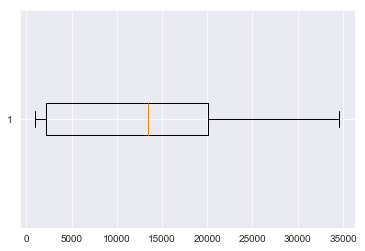

In [21]:
# Boedo Departamento
mask_place_name = data.place_name == 'Boedo'
mask_property_type = data.property_type == 'apartment'
data_Belgrano = data.loc[mask_place_name&mask_property_type]
print ("Q",data_Belgrano.place_name.value_counts())
plt.boxplot(data_Belgrano["price_usd_per_m2"], vert = False)
plt.show

In [22]:
df_final = pd.DataFrame()
mask_place_name = data.place_name == 'Boedo'
mask_property_type = data.property_type == 'apartment'
place_name_list = data.loc[mask_place_name&mask_property_type].place_name.unique()
prop_type_list =  data.loc[mask_place_name&mask_property_type].property_type.unique()
for pn in place_name_list:
    for pt in prop_type_list:
        df_temp = remove_outlier(data, 0.25, 0.75, 1.5, 'price_usd_per_m2', pn, 'place_name', pt, 'property_type')
        df_final = df_final.append(df_temp)

Q Boedo    584
Name: place_name, dtype: int64


<function matplotlib.pyplot.show(*args, **kw)>

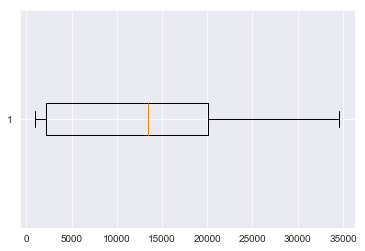

In [23]:
mask_place_name = df_final.place_name == 'Boedo'
mask_property_type = df_final.property_type == 'apartment'
data_Belgrano = df_final.loc[mask_place_name&mask_property_type]
print ("Q",data_Belgrano.place_name.value_counts())
plt.boxplot(data_Belgrano["price_usd_per_m2"], vert = False)
plt.show

In [24]:
df_final1 = pd.DataFrame()
mask_precio_max = df_final.price_usd_per_m2 < 3500
mask_place_name = df_final.place_name == 'Boedo'
mask_property_type = df_final.property_type == 'apartment'
place_name_list = df_final.loc[mask_place_name&mask_property_type].place_name.unique()
prop_type_list =  df_final.loc[mask_place_name&mask_property_type].property_type.unique()
for pn in place_name_list:
    for pt in prop_type_list:
        df_temp = remove_outlier(df_final.loc[mask_precio_max], 0.10, 0.90, 1.5, 'price_usd_per_m2', pn, 'place_name', pt, 'property_type')
        df_final1 = df_final1.append(df_temp)

Q Boedo    185
Name: place_name, dtype: int64


<function matplotlib.pyplot.show(*args, **kw)>

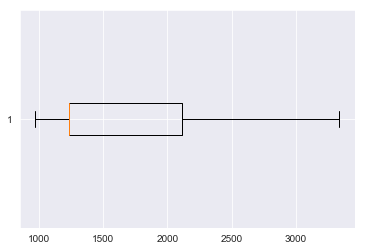

In [25]:
data_Belgrano = df_final1
print ("Q",data_Belgrano.place_name.value_counts())
plt.boxplot(data_Belgrano["price_usd_per_m2"], vert = False)
plt.show

In [26]:
ver = df_final1.loc[:,['price_usd_per_m2','Id_caso']]

ver.sort_values(by = [('price_usd_per_m2')], ascending=False)

,price_usd_per_m2,Id_caso
5736,3340.00,25668
5750,3337.14,25684
5730,3337.14,25661
5773,3244.57,25708
25364,3014.10,105347
...,...,...
5617,1106.67,25513
5623,1106.67,25521
5629,1106.67,25528
5636,1106.67,25535


In [27]:
# borro todos los de Boedo / Departamento
mask_place_name = data.place_name == 'Boedo'
mask_property_type = data.property_type == 'apartment'
data = data.drop(data.loc[mask_place_name&mask_property_type].index)

In [28]:
# append todos los de Boedo / Departamento nuevos (sin outliers)
data = data.append(df_final1)

In [29]:
# valido
mask_place_name = data.place_name == 'Boedo'
mask_property_type = data.property_type == 'apartment'
data.loc[mask_place_name&mask_property_type]

,Id_caso,property_type,place_with_parent_names,country_name,state_name,lat-lon,lat,lon,price,currency,...,pn_Villa Lugano,pn_Villa Luro,pn_Villa Ortuzar,pn_Villa Pueyrredón,pn_Villa Real,pn_Villa Riachuelo,pn_Villa Santa Rita,pn_Villa Soldati,pn_Villa Urquiza,pn_Villa del Parque
23,66,apartment,|Argentina|Capital Federal|Boedo|,Argentina,Capital Federal,"-34.6187769485,-58.4026450688",-34.618777,-58.402645,72900.0,USD,...,0,0,0,0,0,0,0,0,0,0
1028,6482,apartment,|Argentina|Capital Federal|Boedo|,Argentina,Capital Federal,"-34.6234762,-58.4121858",-34.623476,-58.412186,75000.0,USD,...,0,0,0,0,0,0,0,0,0,0
2536,12682,apartment,|Argentina|Capital Federal|Boedo|,Argentina,Capital Federal,NaN,NaN,NaN,73000.0,USD,...,0,0,0,0,0,0,0,0,0,0
4544,21552,apartment,|Argentina|Capital Federal|Boedo|,Argentina,Capital Federal,"-34.6277173,-58.4318588",-34.627717,-58.431859,45000.0,USD,...,0,0,0,0,0,0,0,0,0,0
5318,24887,apartment,|Argentina|Capital Federal|Boedo|,Argentina,Capital Federal,"-34.6233498,-58.4205356",-34.623350,-58.420536,74000.0,USD,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25362,105336,apartment,|Argentina|Capital Federal|Boedo|,Argentina,Capital Federal,"-34.6208776148,-58.4164461837",-34.620878,-58.416446,1881000.0,ARS,...,0,0,0,0,0,0,0,0,0,0
25364,105347,apartment,|Argentina|Capital Federal|Boedo|,Argentina,Capital Federal,"-34.6208776148,-58.4164461837",-34.620878,-58.416446,1881000.0,ARS,...,0,0,0,0,0,0,0,0,0,0
25368,105362,apartment,|Argentina|Capital Federal|Boedo|,Argentina,Capital Federal,"-34.6208776148,-58.4164461837",-34.620878,-58.416446,1572000.0,ARS,...,0,0,0,0,0,0,0,0,0,0
25379,105486,apartment,|Argentina|Capital Federal|Boedo|,Argentina,Capital Federal,"-34.6241096332,-58.4136098022",-34.624110,-58.413610,69000.0,USD,...,0,0,0,0,0,0,0,0,0,0


Q Boedo    30
Name: place_name, dtype: int64


<function matplotlib.pyplot.show(*args, **kw)>

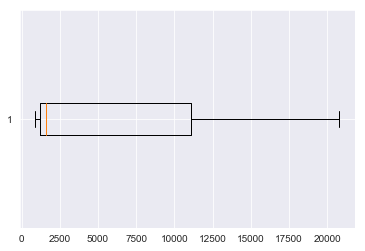

In [30]:
# Boedo Casa
mask_place_name = data.place_name == 'Boedo'
mask_property_type = data.property_type == 'house'
data_Belgrano = data.loc[mask_place_name&mask_property_type]
print ("Q",data_Belgrano.place_name.value_counts())
plt.boxplot(data_Belgrano["price_usd_per_m2"], vert = False)
plt.show

In [31]:
df_final = pd.DataFrame()
mask_place_name = data.place_name == 'Boedo'
mask_property_type = data.property_type == 'house'
place_name_list = data.loc[mask_place_name&mask_property_type].place_name.unique()
prop_type_list =  data.loc[mask_place_name&mask_property_type].property_type.unique()
for pn in place_name_list:
    for pt in prop_type_list:
        df_temp = remove_outlier(data, 0.25, 0.75, 1.5, 'price_usd_per_m2', pn, 'place_name', pt, 'property_type')
        df_final = df_final.append(df_temp)

Q Boedo    30
Name: place_name, dtype: int64


<function matplotlib.pyplot.show(*args, **kw)>

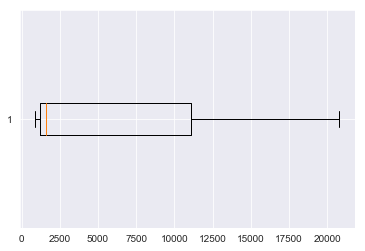

In [32]:
mask_place_name = df_final.place_name == 'Boedo'
mask_property_type = df_final.property_type == 'house'
data_Belgrano = df_final.loc[mask_place_name&mask_property_type]
print ("Q",data_Belgrano.place_name.value_counts())
plt.boxplot(data_Belgrano["price_usd_per_m2"], vert = False)
plt.show

In [33]:
ver = df_final.loc[:,['price_usd_per_m2','Id_caso']]
ver.sort_values(by = [('price_usd_per_m2')], ascending=False)

,price_usd_per_m2,Id_caso
6426,20784.21,26599
6404,20784.21,26555
6467,17906.06,26702
6469,17903.03,26704
5658,15196.67,25571
5651,15176.67,25562
5652,14520.00,25563
5653,14093.33,25564
11570,1946.15,47937
8478,1944.44,35735


In [34]:
df_final1 = pd.DataFrame()
mask_precio_max = df_final.price_usd_per_m2 < 10000
mask_place_name = df_final.place_name == 'Boedo'
mask_property_type = df_final.property_type == 'house'
place_name_list = df_final.loc[mask_place_name&mask_property_type].place_name.unique()
prop_type_list =  df_final.loc[mask_place_name&mask_property_type].property_type.unique()
for pn in place_name_list:
    for pt in prop_type_list:
        df_temp = remove_outlier(df_final.loc[mask_precio_max], 0.10, 0.90, 1.5, 'price_usd_per_m2', pn, 'place_name', pt, 'property_type')
        df_final1 = df_final1.append(df_temp)

Q Boedo    22
Name: place_name, dtype: int64


<function matplotlib.pyplot.show(*args, **kw)>

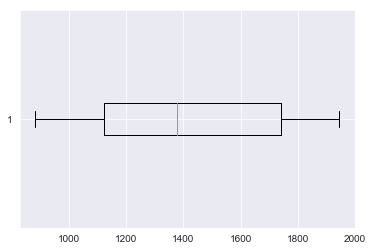

In [35]:
data_Belgrano = df_final1
print ("Q",data_Belgrano.place_name.value_counts())
plt.boxplot(data_Belgrano["price_usd_per_m2"], vert = False)
plt.show

In [36]:
ver = df_final1.loc[:,['price_usd_per_m2','Id_caso']]
ver.sort_values(by = [('price_usd_per_m2')], ascending=False)

,price_usd_per_m2,Id_caso
11570,1946.15,47937
8478,1944.44,35735
14233,1892.86,57976
13347,1822.43,55048
6420,1774.19,26591
6450,1774.19,26634
3596,1649.48,17392
25388,1596.64,105586
3756,1550.39,18013
13471,1436.57,55281


In [37]:
# borro todos los de Boedo / Casa
mask_place_name = data.place_name == 'Boedo'
mask_property_type = data.property_type == 'house'
data = data.drop(data.loc[mask_place_name&mask_property_type].index)

In [38]:
# append todos los de Boedo / Casa nuevos (sin outliers)
data = data.append(df_final1)

In [39]:
# valido
mask_place_name = data.place_name == 'Boedo'
mask_property_type = data.property_type == 'house'
data.loc[mask_place_name&mask_property_type]

,Id_caso,property_type,place_with_parent_names,country_name,state_name,lat-lon,lat,lon,price,currency,...,pn_Villa Lugano,pn_Villa Luro,pn_Villa Ortuzar,pn_Villa Pueyrredón,pn_Villa Real,pn_Villa Riachuelo,pn_Villa Santa Rita,pn_Villa Soldati,pn_Villa Urquiza,pn_Villa del Parque
15,51,house,|Argentina|Capital Federal|Boedo|,Argentina,Capital Federal,"-34.6363209,-58.4107019",-34.636321,-58.410702,550000.0,USD,...,0,0,0,0,0,0,0,0,0,0
3596,17392,house,|Argentina|Capital Federal|Boedo|,Argentina,Capital Federal,"-34.620767,-58.4141356",-34.620767,-58.414136,800000.0,USD,...,0,0,0,0,0,0,0,0,0,0
3756,18013,house,|Argentina|Capital Federal|Boedo|,Argentina,Capital Federal,"-34.6328351,-58.4144969",-34.632835,-58.414497,400000.0,USD,...,0,0,0,0,0,0,0,0,0,0
3881,18524,house,|Argentina|Capital Federal|Boedo|,Argentina,Capital Federal,"-34.6223456,-58.4229163",-34.622346,-58.422916,300000.0,USD,...,0,0,0,0,0,0,0,0,0,0
5194,24532,house,|Argentina|Capital Federal|Boedo|,Argentina,Capital Federal,"-34.6292035,-58.4118558",-34.629203,-58.411856,245000.0,USD,...,0,0,0,0,0,0,0,0,0,0
5467,25192,house,|Argentina|Capital Federal|Boedo|,Argentina,Capital Federal,"-34.6342606,-58.4178509",-34.634261,-58.417851,370000.0,USD,...,0,0,0,0,0,0,0,0,0,0
5468,25193,house,|Argentina|Capital Federal|Boedo|,Argentina,Capital Federal,"-34.6314763,-58.4165521",-34.631476,-58.416552,450000.0,USD,...,0,0,0,0,0,0,0,0,0,0
6146,26187,house,|Argentina|Capital Federal|Boedo|,Argentina,Capital Federal,NaN,NaN,NaN,37000.0,USD,...,0,0,0,0,0,0,0,0,0,0
6316,26391,house,|Argentina|Capital Federal|Boedo|,Argentina,Capital Federal,NaN,NaN,NaN,40000.0,USD,...,0,0,0,0,0,0,0,0,0,0
6420,26591,house,|Argentina|Capital Federal|Boedo|,Argentina,Capital Federal,"-34.6209899,-58.4165467",-34.620990,-58.416547,55000.0,USD,...,0,0,0,0,0,0,0,0,0,0


Q San Cristobal    328
Name: place_name, dtype: int64


<function matplotlib.pyplot.show(*args, **kw)>

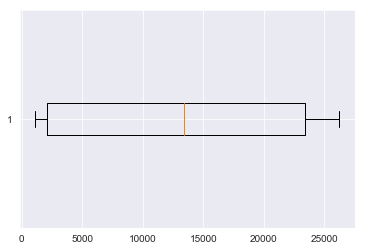

In [40]:
# San Cristobal Departamento
mask_place_name = data.place_name == 'San Cristobal'
mask_property_type = data.property_type == 'apartment'
data_Belgrano = data.loc[mask_place_name&mask_property_type]
print ("Q",data_Belgrano.place_name.value_counts())
plt.boxplot(data_Belgrano["price_usd_per_m2"], vert = False)
plt.show

In [41]:
df_final = pd.DataFrame()
mask_place_name = data.place_name == 'San Cristobal'
mask_property_type = data.property_type == 'apartment'
place_name_list = data.loc[mask_place_name&mask_property_type].place_name.unique()
prop_type_list =  data.loc[mask_place_name&mask_property_type].property_type.unique()
for pn in place_name_list:
    for pt in prop_type_list:
        df_temp = remove_outlier(data, 0.25, 0.75, 1.5, 'price_usd_per_m2', pn, 'place_name', pt, 'property_type')
        df_final = df_final.append(df_temp)

Q San Cristobal    328
Name: place_name, dtype: int64


<function matplotlib.pyplot.show(*args, **kw)>

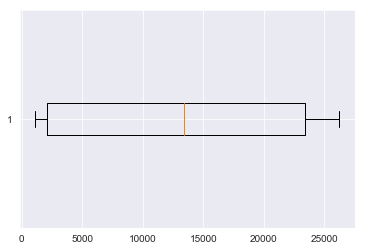

In [42]:
mask_place_name = df_final.place_name == 'San Cristobal'
mask_property_type = df_final.property_type == 'apartment'
data_Belgrano = df_final.loc[mask_place_name&mask_property_type]
print ("Q",data_Belgrano.place_name.value_counts())
plt.boxplot(data_Belgrano["price_usd_per_m2"], vert = False)
plt.show

In [43]:
ver = df_final.loc[:,['price_usd_per_m2','Id_caso']]
ver.sort_values(by = [('price_usd_per_m2')], ascending=False)

,price_usd_per_m2,Id_caso
6320,26241.64,26396
6274,26136.36,26339
6214,26018.97,26270
6232,25991.55,26291
6125,25967.09,26161
...,...,...
13599,1330.36,55662
25403,1325.58,105745
5313,1263.16,24882
3180,1166.67,15642


In [44]:
# armamos un data con los nulos de precio y solo algunas columnas
precio_nulo = data.price_usd_per_m2.isnull()
x = data.loc[precio_nulo,["Id_caso", "place_name", "price_usd_per_m2"]]
x.set_index("Id_caso", inplace = True)

In [45]:
df_final1 = pd.DataFrame()
mask_precio_max = df_final.price_usd_per_m2 < 3500
mask_place_name = df_final.place_name == 'San Cristobal'
mask_property_type = df_final.property_type == 'apartment'
place_name_list = df_final.loc[mask_place_name&mask_property_type].place_name.unique()
prop_type_list =  df_final.loc[mask_place_name&mask_property_type].property_type.unique()
for pn in place_name_list:
    for pt in prop_type_list:
        df_temp = remove_outlier(df_final.loc[mask_precio_max], 0.10, 0.90, 1.5, 'price_usd_per_m2', pn, 'place_name', pt, 'property_type')
        df_final1 = df_final1.append(df_temp)

Q San Cristobal    116
Name: place_name, dtype: int64


<function matplotlib.pyplot.show(*args, **kw)>

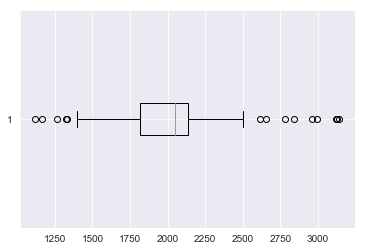

In [46]:
data_Belgrano = df_final1
print ("Q",data_Belgrano.place_name.value_counts())
plt.boxplot(data_Belgrano["price_usd_per_m2"], vert = False)
plt.show

In [47]:
ver = df_final1.loc[:,['price_usd_per_m2','Id_caso']]
ver.sort_values(by = [('price_usd_per_m2')], ascending=False)

,price_usd_per_m2,Id_caso
27626,3142.86,114468
10829,3125.00,45002
19629,3121.95,79116
5729,2995.00,25660
1013,2962.96,6433
...,...,...
13599,1330.36,55662
25403,1325.58,105745
5313,1263.16,24882
3180,1166.67,15642


In [48]:
# borro todos los de San Cristobal / Departamento
mask_place_name = data.place_name == 'San Cristobal'
mask_property_type = data.property_type == 'apartment'
data = data.drop(data.loc[mask_place_name&mask_property_type].index)

In [49]:
# append todos los de San Cristobal / Departamento nuevos (sin outliers)
data = data.append(df_final1)

In [50]:
# valido
mask_place_name = data.place_name == 'San Cristobal'
mask_property_type = data.property_type == 'apartment'
data.loc[mask_place_name&mask_property_type]

,Id_caso,property_type,place_with_parent_names,country_name,state_name,lat-lon,lat,lon,price,currency,...,pn_Villa Lugano,pn_Villa Luro,pn_Villa Ortuzar,pn_Villa Pueyrredón,pn_Villa Real,pn_Villa Riachuelo,pn_Villa Santa Rita,pn_Villa Soldati,pn_Villa Urquiza,pn_Villa del Parque
315,1532,apartment,|Argentina|Capital Federal|San Cristobal|,Argentina,Capital Federal,"-34.618949,-58.3944713",-34.618949,-58.394471,80000.0,USD,...,0,0,0,0,0,0,0,0,0,0
1013,6433,apartment,|Argentina|Capital Federal|San Cristobal|,Argentina,Capital Federal,"-34.6236285,-58.4059861",-34.623628,-58.405986,160000.0,USD,...,0,0,0,0,0,0,0,0,0,0
1518,8184,apartment,|Argentina|Capital Federal|San Cristobal|,Argentina,Capital Federal,"-34.6244262,-58.3973636",-34.624426,-58.397364,71000.0,USD,...,0,0,0,0,0,0,0,0,0,0
1576,8398,apartment,|Argentina|Capital Federal|San Cristobal|,Argentina,Capital Federal,"-34.620594457,-58.3964623778",-34.620594,-58.396462,61500.0,USD,...,0,0,0,0,0,0,0,0,0,0
2092,10515,apartment,|Argentina|Capital Federal|San Cristobal|,Argentina,Capital Federal,"-34.6244262,-58.3973636",-34.624426,-58.397364,76000.0,USD,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26257,110344,apartment,|Argentina|Capital Federal|San Cristobal|,Argentina,Capital Federal,"-34.6298632,-58.4098679",-34.629863,-58.409868,67000.0,USD,...,0,0,0,0,0,0,0,0,0,0
26380,110471,apartment,|Argentina|Capital Federal|San Cristobal|,Argentina,Capital Federal,"-34.6244262,-58.3973636",-34.624426,-58.397364,78000.0,USD,...,0,0,0,0,0,0,0,0,0,0
27626,114468,apartment,|Argentina|Capital Federal|San Cristobal|,Argentina,Capital Federal,"-34.6244262,-58.3973636",-34.624426,-58.397364,110000.0,USD,...,0,0,0,0,0,0,0,0,0,0
27778,116493,apartment,|Argentina|Capital Federal|San Cristobal|,Argentina,Capital Federal,"-34.6182824,-58.3945071",-34.618282,-58.394507,105000.0,USD,...,0,0,0,0,0,0,0,0,0,0


In [51]:
#+++++++++++++++++++++++++++++++
#validacion general
#++++++++++++++++++++++++++++++++

ver = data.groupby(['place_name','property_type']).agg({'price_usd_per_m2':  ['max']})
ver.sort_values(by = [('price_usd_per_m2', 'max')], ascending=False)

,,price_usd_per_m2
,,max
place_name,property_type,
Puerto Madero,apartment,9000.00
Palermo,store,8900.00
Palermo Chico,store,8536.59
Recoleta,store,8163.27
Puerto Madero,store,7857.14
...,...,...
Villa Real,house,1056.91
Pompeya,PH,1022.73


In [52]:
# mediana de precios por barrios
mediana = dict(data.groupby("place_name")["price_usd_per_m2"].median())

In [53]:
for v, k in mediana.items():
#     print(v, k)
    barrios_nulos = x.place_name == v
    x.loc[barrios_nulos,:] = k

In [54]:
# cantidad de nulos por barrios
data_porc_nulos = pd.DataFrame(x["place_name"].value_counts())
data_porc_nulos.rename(columns = {"place_name":"nulos"}, inplace = True)
data_porc_todos = pd.DataFrame(data.place_name.value_counts())
data_porc_todos
data_porc = pd.concat([data_porc_nulos, data_porc_todos], axis = 1)
data_porc["porc"] = (data_porc.nulos/data_porc.place_name * 100).round(2)
data_porc.sort_values(by = ["porc"], ascending = False)

,nulos,place_name,porc
Belgrano,NaN,1804,NaN
Palermo,NaN,1722,NaN
Caballito,NaN,1499,NaN
Recoleta,NaN,1067,NaN
Villa Urquiza,NaN,999,NaN
...,...,...,...
Versalles,NaN,23,NaN
Velez Sarsfield,NaN,22,NaN
Parque Chas,NaN,11,NaN
Villa Soldati,NaN,4,NaN


In [55]:
# armamos df con los valores imputados para concatenar al data original
a = x.drop("place_name",axis=1)
a.rename(columns = {"price_usd_per_m2": "precio_imputado"}, inplace=True)

In [56]:
# seteamos índices para concatenar
data.set_index("Id_caso", inplace = True)

In [57]:
data

,property_type,place_with_parent_names,country_name,state_name,lat-lon,lat,lon,price,currency,price_aprox_local_currency,...,pn_Villa Lugano,pn_Villa Luro,pn_Villa Ortuzar,pn_Villa Pueyrredón,pn_Villa Real,pn_Villa Riachuelo,pn_Villa Santa Rita,pn_Villa Soldati,pn_Villa Urquiza,pn_Villa del Parque
Id_caso,,,,,,,,,,,,,,,,,,,,,
0,PH,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,1093959.00,...,0,0,0,0,0,0,0,0,0,0
16,PH,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,"-34.6523561177,-58.5016239381",-34.652356,-58.501624,239000.0,USD,4217035.50,...,0,0,0,0,0,0,0,0,0,0
254,PH,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,"-34.6572422,-58.5029706",-34.657242,-58.502971,53000.0,USD,935158.50,...,0,0,0,0,0,0,0,0,0,0
559,PH,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,"-34.6569204,-58.4897843",-34.656920,-58.489784,165000.0,USD,2911342.50,...,0,0,0,0,0,0,0,0,0,0
5178,PH,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,"-34.6494154483,-58.5082290736",-34.649415,-58.508229,158000.0,USD,2787831.00,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110344,apartment,|Argentina|Capital Federal|San Cristobal|,Argentina,Capital Federal,"-34.6298632,-58.4098679",-34.629863,-58.409868,67000.0,USD,1182181.50,...,0,0,0,0,0,0,0,0,0,0
110471,apartment,|Argentina|Capital Federal|San Cristobal|,Argentina,Capital Federal,"-34.6244262,-58.3973636",-34.624426,-58.397364,78000.0,USD,1376271.00,...,0,0,0,0,0,0,0,0,0,0
114468,apartment,|Argentina|Capital Federal|San Cristobal|,Argentina,Capital Federal,"-34.6244262,-58.3973636",-34.624426,-58.397364,110000.0,USD,1940895.00,...,0,0,0,0,0,0,0,0,0,0


In [58]:
data_imputac = pd.concat([data, a], axis = 1)

In [59]:
# imputamos los nulos de mt2 totales con los valores de mt2 cubiertos y lo mismo para las columnas de precio:

super_cub_no_nulo = data.surface_covered_in_m2.notnull()
data.loc[super_cub_no_nulo, "surface_total_in_m2"] = data.loc[super_cub_no_nulo, "surface_covered_in_m2"]

In [60]:
# reemplazamos los valores imputados en la columna precio/mt2
# 'price_per_m2'
precios_no_nulos = data_imputac.precio_imputado.notnull()
data_imputac.loc[precios_no_nulos, "price_usd_per_m2"] = data_imputac.loc[precios_no_nulos, "precio_imputado"]

In [61]:
data = data_imputac

In [62]:
mask_caba_place_name = data.place_name != 'Capital Federal'
mask_nonulo_surface_total_in_m2 = data.surface_total_in_m2.notnull()
mask_nonulo_price_usd_per_m2 = data.price_usd_per_m2.notnull()
#mask_rooms = data.rooms > 0 
#mask_nonulo_rooms = data.rooms.notnull()

In [63]:
data = data.loc[mask_caba_place_name & mask_nonulo_surface_total_in_m2 & mask_nonulo_price_usd_per_m2] #& mask_nonulo_rooms & mask_rooms]

In [64]:
data.shape

(18964, 103)

In [65]:
list(data)

['property_type',
 'place_with_parent_names',
 'country_name',
 'state_name',
 'lat-lon',
 'lat',
 'lon',
 'price',
 'currency',
 'price_aprox_local_currency',
 'price_aprox_usd',
 'floor',
 'rooms',
 'expenses',
 'description',
 'title',
 'Pais',
 'Zona',
 'Partido_barrio',
 'Localidad',
 'Obs_localidad',
 'place_name',
 'geonames_id',
 'price_usd_per_m2',
 'price_per_m2',
 'surface_total_in_m2',
 'surface_covered_in_m2',
 'cochera',
 'piscina',
 'parrilla',
 'baulera',
 'balcon',
 'terraza',
 'jardin',
 'lavadero',
 'subte',
 'seguridad',
 'metrobus',
 'prop_type_apartment',
 'prop_type_house',
 'prop_type_store',
 'pn_Agronomía',
 'pn_Almagro',
 'pn_Balvanera',
 'pn_Barracas',
 'pn_Barrio Norte',
 'pn_Belgrano',
 'pn_Boca',
 'pn_Boedo',
 'pn_Caballito',
 'pn_Capital Federal',
 'pn_Catalinas',
 'pn_Centro / Microcentro',
 'pn_Chacarita',
 'pn_Coghlan',
 'pn_Colegiales',
 'pn_Congreso',
 'pn_Constitución',
 'pn_Flores',
 'pn_Floresta',
 'pn_Las Cañitas',
 'pn_Liniers',
 'pn_Mataderos'

In [66]:
erase_columns = [ 'place_with_parent_names', 'country_name', 'state_name', 'lat-lon',
 'lat', 'lon', 'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd', 'floor', 'expenses', 'description',
 'title', 'Pais', 'Zona', 'Partido_barrio', 'Localidad', 'Obs_localidad', 'geonames_id', 'price_per_m2', 'surface_covered_in_m2',
 'pn_Capital Federal','pn_Villa Riachuelo']

In [67]:
data = data.drop(data[erase_columns], axis=1)

In [68]:
data.corr()

,rooms,price_usd_per_m2,surface_total_in_m2,cochera,piscina,parrilla,baulera,balcon,terraza,jardin,...,pn_Villa Lugano,pn_Villa Luro,pn_Villa Ortuzar,pn_Villa Pueyrredón,pn_Villa Real,pn_Villa Santa Rita,pn_Villa Soldati,pn_Villa Urquiza,pn_Villa del Parque,precio_imputado
rooms,1.000000,0.000471,0.726944,0.039163,-0.156735,-0.153867,0.211798,0.138576,0.074191,0.077031,...,0.043721,-0.016732,-0.004848,-0.012176,0.022254,0.004940,0.017084,-0.044937,0.002128,NaN
price_usd_per_m2,0.000471,1.000000,-0.062073,0.256566,0.255982,0.005412,0.139502,0.087193,-0.060211,0.067488,...,-0.111928,-0.063946,-0.016496,-0.042687,-0.040764,-0.025071,-0.026189,-0.025900,-0.052485,NaN
surface_total_in_m2,0.726944,-0.062073,1.000000,0.028269,-0.017171,0.007374,0.054616,0.009420,0.089185,0.072549,...,0.022355,-0.010221,0.043086,0.007186,0.013181,0.010561,0.484699,-0.031667,0.003343,NaN
cochera,0.039163,0.256566,0.028269,1.000000,0.252896,0.237379,0.285537,0.235899,0.134599,0.056200,...,-0.043507,0.006236,0.012056,-0.003936,-0.013259,-0.010173,-0.010236,0.058899,-0.027420,NaN
piscina,-0.156735,0.255982,-0.017171,0.252896,1.000000,0.401418,0.110379,0.107052,0.111693,0.144426,...,-0.036188,-0.030515,-0.020169,-0.027111,-0.019837,-0.009471,-0.007930,-0.000233,0.042307,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pn_Villa Santa Rita,0.004940,-0.025071,0.010561,-0.010173,-0.009471,0.005522,0.009940,0.014287,0.015311,0.001258,...,-0.002838,-0.004216,-0.002180,-0.002619,-0.001320,1.000000,-0.000528,-0.008568,-0.004606,NaN
pn_Villa Soldati,0.017084,-0.026189,0.484699,-0.010236,-0.007930,-0.008472,-0.005956,-0.009505,-0.008522,-0.002715,...,-0.001135,-0.001686,-0.000871,-0.001047,-0.000528,-0.000528,1.000000,-0.003425,-0.001841,NaN
pn_Villa Urquiza,-0.044937,-0.025900,-0.031667,0.058899,-0.000233,0.089712,0.034419,0.085247,0.082310,-0.007470,...,-0.018419,-0.027366,-0.014146,-0.016996,-0.008568,-0.008568,-0.003425,1.000000,-0.029897,NaN
pn_Villa del Parque,0.002128,-0.052485,0.003343,-0.027420,0.042307,-0.010832,-0.023098,0.047087,-0.002730,0.172889,...,-0.009903,-0.014713,-0.007606,-0.009138,-0.004606,-0.004606,-0.001841,-0.029897,1.000000,NaN


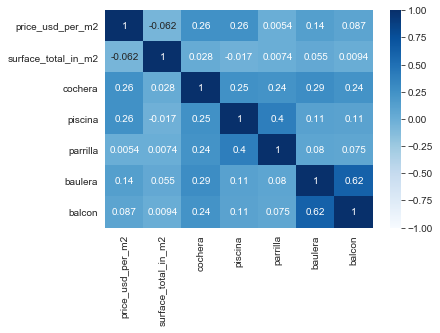

In [69]:
sns.heatmap(data.loc[:, [
 'price_usd_per_m2',
 'surface_total_in_m2',
 'cochera',
 'piscina',
 'parrilla',
 'baulera',
 'balcon'
]].corr(), annot=True, vmin=-1, cmap='Blues');

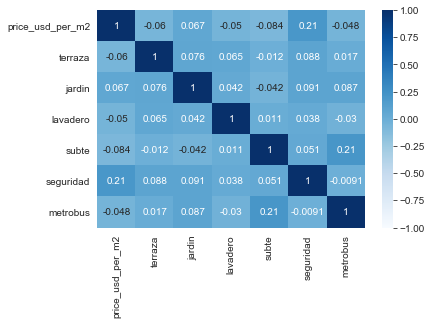

In [70]:
sns.heatmap(data.loc[:, ['price_usd_per_m2',
 'terraza',
 'jardin',
 'lavadero',
 'subte',
 'seguridad',
 'metrobus']].corr(), annot=True, vmin=-1, cmap='Blues');

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [72]:
list(data)

['property_type',
 'rooms',
 'place_name',
 'price_usd_per_m2',
 'surface_total_in_m2',
 'cochera',
 'piscina',
 'parrilla',
 'baulera',
 'balcon',
 'terraza',
 'jardin',
 'lavadero',
 'subte',
 'seguridad',
 'metrobus',
 'prop_type_apartment',
 'prop_type_house',
 'prop_type_store',
 'pn_Agronomía',
 'pn_Almagro',
 'pn_Balvanera',
 'pn_Barracas',
 'pn_Barrio Norte',
 'pn_Belgrano',
 'pn_Boca',
 'pn_Boedo',
 'pn_Caballito',
 'pn_Catalinas',
 'pn_Centro / Microcentro',
 'pn_Chacarita',
 'pn_Coghlan',
 'pn_Colegiales',
 'pn_Congreso',
 'pn_Constitución',
 'pn_Flores',
 'pn_Floresta',
 'pn_Las Cañitas',
 'pn_Liniers',
 'pn_Mataderos',
 'pn_Monserrat',
 'pn_Monte Castro',
 'pn_Nuñez',
 'pn_Once',
 'pn_Palermo',
 'pn_Palermo Chico',
 'pn_Palermo Hollywood',
 'pn_Palermo Soho',
 'pn_Palermo Viejo',
 'pn_Parque Avellaneda',
 'pn_Parque Centenario',
 'pn_Parque Chacabuco',
 'pn_Parque Chas',
 'pn_Parque Patricios',
 'pn_Paternal',
 'pn_Pompeya',
 'pn_Puerto Madero',
 'pn_Recoleta',
 'pn_Retiro

In [73]:
# modelo 1 (con todas las features)

model = LinearRegression(fit_intercept=True)

feature_cols = [#'rooms',
'surface_total_in_m2',
 'cochera',
 'piscina',
 'parrilla',
 'baulera',
 'balcon',
 'terraza',
 'jardin',
 'lavadero',
 'subte',
 'seguridad',
 'metrobus',
 'prop_type_apartment',
 'prop_type_house',
 'prop_type_store',
 'pn_Agronomía',
 'pn_Almagro',
 'pn_Balvanera',
 'pn_Barracas',
 'pn_Barrio Norte',
 'pn_Belgrano',
 'pn_Boca',
 'pn_Boedo',
 'pn_Caballito',
 'pn_Catalinas',
 'pn_Centro / Microcentro',
 'pn_Chacarita',
 'pn_Coghlan',
 'pn_Colegiales',
 'pn_Congreso',
 'pn_Constitución',
 'pn_Flores',
 'pn_Floresta',
 'pn_Las Cañitas',
 'pn_Liniers',
 'pn_Mataderos',
 'pn_Monserrat',
 'pn_Monte Castro',
 'pn_Nuñez',
 'pn_Once',
 'pn_Palermo',
 'pn_Palermo Chico',
 'pn_Palermo Hollywood',
 'pn_Palermo Soho',
 'pn_Palermo Viejo',
 'pn_Parque Avellaneda',
 'pn_Parque Centenario',
 'pn_Parque Chacabuco',
 'pn_Parque Chas',
 'pn_Parque Patricios',
 'pn_Paternal',
 'pn_Pompeya',
 'pn_Puerto Madero',
 'pn_Recoleta',
 'pn_Retiro',
 'pn_Saavedra',
 'pn_San Cristobal',
 'pn_San Nicolás',
 'pn_San Telmo',
 'pn_Tribunales',
 'pn_Velez Sarsfield',
 'pn_Versalles',
 'pn_Villa Crespo',
 'pn_Villa Devoto',
 'pn_Villa General Mitre',
 'pn_Villa Lugano',
 'pn_Villa Luro',
 'pn_Villa Ortuzar',
 'pn_Villa Pueyrredón',
 'pn_Villa Real',
 #'pn_Villa Riachuelo',
 'pn_Villa Santa Rita',
 'pn_Villa Soldati',
 'pn_Villa Urquiza',
 'pn_Villa del Parque']
X = data[feature_cols]
y = data.price_usd_per_m2

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)

scaler = StandardScaler()
scaler.fit_transform(Xtrain)

model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
ypred_train = model.predict(Xtrain)

print ('MAE:', mean_absolute_error(ytest, ypred).round(2))
print ('MSE:', mean_squared_error(ytest, ypred).round(2))
print ('RMSE:', np.sqrt(mean_squared_error(ytest, ypred)).round(2))
print ('R2:', r2_score(ytest, ypred).round(3))

MAE: 432.19
MSE: 376244.31
RMSE: 613.39
R2: 0.616


In [74]:
r2_score(ytrain, ypred_train).round(3)

0.639

In [81]:
# modelo 2 (con features con correlacion mayor a 0,1)

model = LinearRegression(fit_intercept=True)

feature_cols = [#'rooms',
'surface_total_in_m2',
 'cochera',
 'piscina',
#  'parrilla',
 'baulera',
#  'balcon',
#  'terraza',
#  'jardin',
#  'lavadero',
#  'subte',
 'seguridad',
#  'metrobus',
 'prop_type_apartment',
 'prop_type_house',
 'prop_type_store',
 'pn_Agronomía',
 'pn_Almagro',
 'pn_Balvanera',
 'pn_Barracas',
 'pn_Barrio Norte',
 'pn_Belgrano',
 'pn_Boca',
 'pn_Boedo',
 'pn_Caballito',
 'pn_Catalinas',
 'pn_Centro / Microcentro',
 'pn_Chacarita',
 'pn_Coghlan',
 'pn_Colegiales',
 'pn_Congreso',
 'pn_Constitución',
 'pn_Flores',
 'pn_Floresta',
 'pn_Las Cañitas',
 'pn_Liniers',
 'pn_Mataderos',
 'pn_Monserrat',
 'pn_Monte Castro',
 'pn_Nuñez',
 'pn_Once',
 'pn_Palermo',
 'pn_Palermo Chico',
 'pn_Palermo Hollywood',
 'pn_Palermo Soho',
 'pn_Palermo Viejo',
 'pn_Parque Avellaneda',
 'pn_Parque Centenario',
 'pn_Parque Chacabuco',
 'pn_Parque Chas',
 'pn_Parque Patricios',
 'pn_Paternal',
 'pn_Pompeya',
 'pn_Puerto Madero',
 'pn_Recoleta',
 'pn_Retiro',
 'pn_Saavedra',
 'pn_San Cristobal',
 'pn_San Nicolás',
 'pn_San Telmo',
 'pn_Tribunales',
 'pn_Velez Sarsfield',
 'pn_Versalles',
 'pn_Villa Crespo',
 'pn_Villa Devoto',
 'pn_Villa General Mitre',
 'pn_Villa Lugano',
 'pn_Villa Luro',
 'pn_Villa Ortuzar',
 'pn_Villa Pueyrredón',
 'pn_Villa Real',
 #'pn_Villa Riachuelo',
 'pn_Villa Santa Rita',
 'pn_Villa Soldati',
 'pn_Villa Urquiza',
 'pn_Villa del Parque']
X = data[feature_cols]
y = data.price_usd_per_m2

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)

scaler = StandardScaler()
scaler.fit_transform(Xtrain)

model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
ypred_train = model.predict(Xtrain)

print ('MAE:', mean_absolute_error(ytest, ypred).round(2))
print ('MSE:', mean_squared_error(ytest, ypred).round(2))
print ('RMSE:', np.sqrt(mean_squared_error(ytest, ypred)).round(2))
print ('R2:', r2_score(ytest, ypred).round(3))

MAE: 434.45
MSE: 381595.44
RMSE: 617.73
R2: 0.61


In [82]:
r2_score(ytrain, ypred_train).round(3)

0.635

In [75]:
data['surface_total_in_m2_x2'] = data['surface_total_in_m2']**2
data['surface_total_in_m2_x3'] = data['surface_total_in_m2']**3
data['surface_total_in_m2_x4'] = data['surface_total_in_m2']**4
data['surface_total_in_m2_x5'] = data['surface_total_in_m2']**5
data['surface_total_in_m2_x6'] = data['surface_total_in_m2']**6

In [85]:
# modelo 3 (trabajo con polinomios de variables)

model = LinearRegression(fit_intercept=True)

feature_cols = [
#'rooms',
'surface_total_in_m2',
 'cochera',
 'piscina',
 'parrilla',
 'baulera',
 'balcon',
  'terraza',
  'jardin',
  'lavadero',
'subte',
 'seguridad',
'metrobus',
'surface_total_in_m2_x2',
#  'surface_total_in_m2_x3',
 'prop_type_apartment',
 'prop_type_house',
 'prop_type_store',
 'pn_Agronomía',
 'pn_Almagro',
 'pn_Balvanera',
 'pn_Barracas',
 'pn_Barrio Norte',
 'pn_Belgrano',
 'pn_Boca',
 'pn_Boedo',
 'pn_Caballito',
 'pn_Catalinas',
 'pn_Centro / Microcentro',
 'pn_Chacarita',
 'pn_Coghlan',
 'pn_Colegiales',
 'pn_Congreso',
 'pn_Constitución',
 'pn_Flores',
 'pn_Floresta',
 'pn_Las Cañitas',
 'pn_Liniers',
 'pn_Mataderos',
 'pn_Monserrat',
 'pn_Monte Castro',
 'pn_Nuñez',
 'pn_Once',
 'pn_Palermo',
 'pn_Palermo Chico',
 'pn_Palermo Hollywood',
 'pn_Palermo Soho',
 'pn_Palermo Viejo',
 'pn_Parque Avellaneda',
 'pn_Parque Centenario',
 'pn_Parque Chacabuco',
 'pn_Parque Chas',
 'pn_Parque Patricios',
 'pn_Paternal',
 'pn_Pompeya',
 'pn_Puerto Madero',
 'pn_Recoleta',
 'pn_Retiro',
 'pn_Saavedra',
 'pn_San Cristobal',
 'pn_San Nicolás',
 'pn_San Telmo',
 'pn_Tribunales',
 'pn_Velez Sarsfield',
 'pn_Versalles',
 'pn_Villa Crespo',
 'pn_Villa Devoto',
 'pn_Villa General Mitre',
 'pn_Villa Lugano',
 'pn_Villa Luro',
 'pn_Villa Ortuzar',
 'pn_Villa Pueyrredón',
 'pn_Villa Real',
 #'pn_Villa Riachuelo',
 'pn_Villa Santa Rita',
 'pn_Villa Soldati',
 'pn_Villa Urquiza',
 'pn_Villa del Parque'
]
X = data[feature_cols]
y = data.price_usd_per_m2

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)

scaler = StandardScaler()
scaler.fit_transform(Xtrain)

model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
ypred_train = model.predict(Xtrain)

print ('MAE:', mean_absolute_error(ytest, ypred).round(2))
print ('MSE:', mean_squared_error(ytest, ypred).round(2))
print ('RMSE:', np.sqrt(mean_squared_error(ytest, ypred)).round(2))
print ('R2:', r2_score(ytest, ypred).round(3))

MAE: 429.36
MSE: 376555.86
RMSE: 613.64
R2: 0.616


In [86]:
r2_score(ytrain, ypred_train).round(3)

0.644

In [79]:
import statsmodels.api as sm

In [80]:
Xs = data[['surface_total_in_m2',
 'cochera',
 'piscina',
 'parrilla',
 'baulera',
 'balcon',
 'terraza',
 'jardin',
 'lavadero',
 'subte',
 'seguridad',
 'metrobus',
 'prop_type_apartment',
 'prop_type_house',
 'prop_type_store',
 'pn_Agronomía',
 'pn_Almagro',
 'pn_Balvanera',
 'pn_Barracas',
 'pn_Barrio Norte',
 'pn_Belgrano',
 'pn_Boca',
 'pn_Boedo',
 'pn_Caballito',
 'pn_Catalinas',
 'pn_Centro / Microcentro',
 'pn_Chacarita',
 'pn_Coghlan',
 'pn_Colegiales',
 'pn_Congreso',
 'pn_Constitución',
 'pn_Flores',
 'pn_Floresta',
 'pn_Las Cañitas',
 'pn_Liniers',
 'pn_Mataderos',
 'pn_Monserrat',
 'pn_Monte Castro',
 'pn_Nuñez',
 'pn_Once',
 'pn_Palermo',
 'pn_Palermo Chico',
 'pn_Palermo Hollywood',
 'pn_Palermo Soho',
 'pn_Palermo Viejo',
 'pn_Parque Avellaneda',
 'pn_Parque Centenario',
 'pn_Parque Chacabuco',
 'pn_Parque Chas',
 'pn_Parque Patricios',
 'pn_Paternal',
 'pn_Pompeya',
 'pn_Puerto Madero',
 'pn_Recoleta',
 'pn_Retiro',
 'pn_Saavedra',
 'pn_San Cristobal',
 'pn_San Nicolás',
 'pn_San Telmo',
 'pn_Tribunales',
 'pn_Velez Sarsfield',
 'pn_Versalles',
 'pn_Villa Crespo',
 'pn_Villa Devoto',
 'pn_Villa General Mitre',
 'pn_Villa Lugano',
 'pn_Villa Luro',
 'pn_Villa Ortuzar',
 'pn_Villa Pueyrredón',
 'pn_Villa Real',
 #'pn_Villa Riachuelo',
 'pn_Villa Santa Rita',
 'pn_Villa Soldati',
 'pn_Villa Urquiza',
 'pn_Villa del Parque']]
ys = data[["price_usd_per_m2"]]

X = sm.add_constant(Xs)



model = sm.OLS(ys.astype(float), X.astype(float)).fit()
predictions = model.predict(X)
print ("EMC:", mean_squared_error(ys, predictions))
print (model.summary())

EMC: 348067.71722718934
                            OLS Regression Results                            
Dep. Variable:       price_usd_per_m2   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     447.3
Date:                Wed, 12 Aug 2020   Prob (F-statistic):               0.00
Time:                        22:06:43   Log-Likelihood:            -1.4790e+05
No. Observations:               18964   AIC:                         2.959e+05
Df Residuals:                   18890   BIC:                         2.965e+05
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
co